In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Let's import the citipy script and practice using it. 
# In our "API_practice file", add a new cell and import the citipy.py script from the citipy module.

# But works on WeatherPy file, not over "API_practice file".

# Use the citipy module to determine city based on latitude and longitude.
# from citipy import citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

ribeira grande pt
bluff nz
illoqqortoormiut gl
meyungs pw
taolanaro mg
upernavik gl
regente feijo br
pervomayskoye ru
mar del plata ar
cabo san lucas mx
ulladulla au
nador ma
albany au
hobart au
taolanaro mg
ushuaia ar
dagumba-an ph
khalkhal ir
hirara jp
warqla dz
torbay ca
belushya guba ru
jizan sa
katsuura jp
thompson ca
port elizabeth za
kodiak us
busselton au
namatanai pg
bose cn
belushya guba ru
yellowknife ca
okhotsk ru
new norfolk au
ushuaia ar
rosarito mx
ilulissat gl
ushuaia ar
chagda ru
havre-saint-pierre ca
tasiilaq gl
geraldton au
cape town za
hobart au
vestmanna fo
souillac mu
bredasdorp za
albany au
padang id
talcahuano cl
batemans bay au
acapulco mx
fort frances ca
rikitea pf
babana ro
iqaluit ca
east london za
henties bay na
illoqqortoormiut gl
hobart au
snihurivka ua
chokurdakh ru
mataura pf
ushuaia ar
arcachon fr
kodinsk ru
yellowknife ca
albany au
angelholm se
cape town za
grand river south east mu
tumut au
arraial do cabo br
dikson ru
rikitea pf
taolanaro mg
ahipara

ndele cf
bluff nz
butaritari ki
ushuaia ar
gamba ga
punta arenas cl
attawapiskat ca
alice springs au
bethel us
mataura pf
higuey do
norman wells ca
rikitea pf
ust-kamchatsk ru
qaanaaq gl
kanniyakumari in
bilma ne
bredasdorp za
cagayan de tawi-tawi ph
tailai cn
manado id
butaritari ki
zeya ru
qaanaaq gl
vaini to
mayor pablo lagerenza py
jamestown sh
bacuit ph
belushya guba ru
norman wells ca
los llanos de aridane es
maumere id
port alfred za
safaga eg
lebu cl
samusu ws
rikitea pf
comodoro rivadavia ar
mocuba mz
taolanaro mg
mersing my
hobart au
kapaa us
rikitea pf
skagastrond is
hermanus za
hobart au
tuktoyaktuk ca
gilgit pk
lappeenranta fi
port moresby pg
visnes no
albany au
fairbanks us
saint-philippe re
attawapiskat ca
tillabery ne
laredo us
bathsheba bb
muros es
ushuaia ar
busselton au
kathu za
atuona pf
hermanus za
salalah om
punta arenas cl
samusu ws
hrodna by
atuona pf
punta arenas cl
rikitea pf
aklavik ca
te anau nz
pevek ru
kankan gn
bethel us
waddan ly
albany au
sentyabrskiy r

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [8]:
# Import the requests libr
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [1]:
# Creating an empty list to hold the weather data.
city_data_list = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    
        try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_country = city_weather["sys"]["country"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # Added weather description
        city_desc= city_weather["weather"][0]["description"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data_list.append({"City": city.title(),
                          "Country": city_country,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": city_desc})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    time.sleep(1)
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



SyntaxError: EOL while scanning string literal (<ipython-input-1-546aae216313>, line 31)

In [11]:

len(city_data)

545

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,69.66,85,100,24.16,PT,2021-11-04 03:46:05
1,Bluff,-46.6000,168.3333,63.81,58,80,5.26,NZ,2021-11-04 03:46:06
2,Upernavik,72.7868,-56.1549,26.01,83,100,7.29,GL,2021-11-04 03:46:07
3,Regente Feijo,-22.2214,-51.3028,72.68,49,0,0.00,BR,2021-11-04 03:46:07
4,Pervomayskoye,43.9190,46.7102,52.29,88,100,7.31,RU,2021-11-04 03:46:08
5,Mar Del Plata,-38.0023,-57.5575,65.08,100,90,1.01,AR,2021-11-04 03:46:08
6,Cabo San Lucas,22.8909,-109.9124,80.51,66,0,2.62,MX,2021-11-04 03:46:09
7,Ulladulla,-35.3500,150.4667,67.77,96,100,4.27,AU,2021-11-04 03:46:09
8,Nador,35.1740,-2.9287,55.65,82,40,2.30,MA,2021-11-04 03:46:10
9,Albany,42.6001,-73.9662,36.75,87,12,3.65,US,2021-11-04 03:45:27


In [13]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [14]:
city_data_df = city_data_df[new_column_order]

In [15]:

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-04 03:46:05,38.5167,-28.7000,69.66,85,100,24.16
1,Bluff,NZ,2021-11-04 03:46:06,-46.6000,168.3333,63.81,58,80,5.26
2,Upernavik,GL,2021-11-04 03:46:07,72.7868,-56.1549,26.01,83,100,7.29
3,Regente Feijo,BR,2021-11-04 03:46:07,-22.2214,-51.3028,72.68,49,0,0.00
4,Pervomayskoye,RU,2021-11-04 03:46:08,43.9190,46.7102,52.29,88,100,7.31
...,...,...,...,...,...,...,...,...,...
540,Marienburg,PL,2021-11-04 03:50:44,54.0359,19.0266,49.05,73,100,8.10
541,Laurel,US,2021-11-04 03:50:45,39.0993,-76.8483,44.73,85,1,0.00
542,Kouango,CF,2021-11-04 03:50:45,4.9934,19.9619,71.46,95,100,1.25
543,Kurilsk,RU,2021-11-04 03:50:46,45.2333,147.8833,45.18,86,100,12.71


In [21]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-04 03:46:05,38.5167,-28.7000,69.66,85,100,24.16
1,Bluff,NZ,2021-11-04 03:46:06,-46.6000,168.3333,63.81,58,80,5.26
2,Upernavik,GL,2021-11-04 03:46:07,72.7868,-56.1549,26.01,83,100,7.29
3,Regente Feijo,BR,2021-11-04 03:46:07,-22.2214,-51.3028,72.68,49,0,0.00
4,Pervomayskoye,RU,2021-11-04 03:46:08,43.9190,46.7102,52.29,88,100,7.31


In [24]:
          #### Create an output file to save the DataFrame as a CSV in a new folder for that file.¶

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
          ##Get Data for Plotting
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1636000435.583192

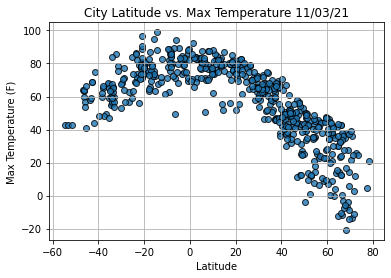

In [29]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [28]:
plt.show()

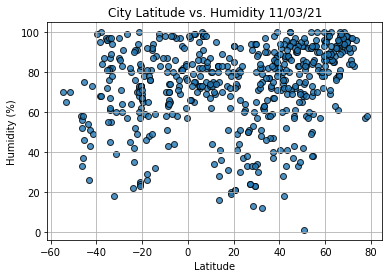

In [30]:
###Plot Latitude vs. Humidity¶

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()



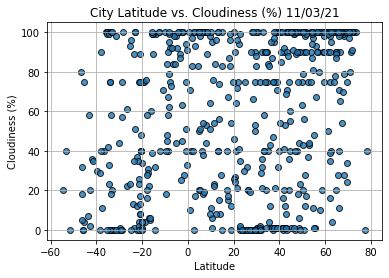

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

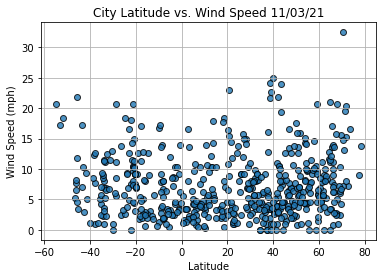

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [35]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                     Khalkhal
Country                        IR
Date          2021-11-04 03:46:12
Lat                       37.6189
Lng                       48.5258
Max Temp                    47.17
Humidity                       90
Cloudiness                     95
Wind Speed                   4.14
Name: 13, dtype: object

In [ ]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

In [36]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2021-11-04 03:46:05,38.5167,-28.7000,69.66,85,100,24.16
2,Upernavik,GL,2021-11-04 03:46:07,72.7868,-56.1549,26.01,83,100,7.29
4,Pervomayskoye,RU,2021-11-04 03:46:08,43.9190,46.7102,52.29,88,100,7.31
6,Cabo San Lucas,MX,2021-11-04 03:46:09,22.8909,-109.9124,80.51,66,0,2.62
8,Nador,MA,2021-11-04 03:46:10,35.1740,-2.9287,55.65,82,40,2.30


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

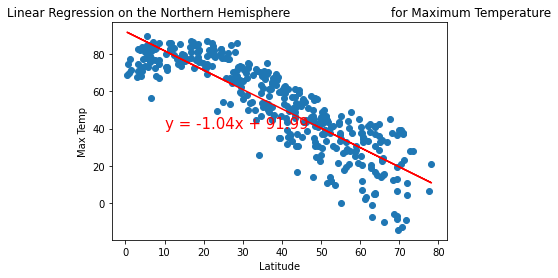

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                        'Linear Regression on the Northern Hemisphere \
                         for Maximum Temperature', 'Max Temp',(10,40))

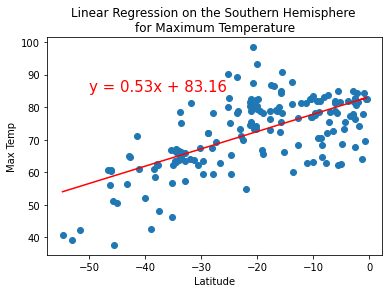

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

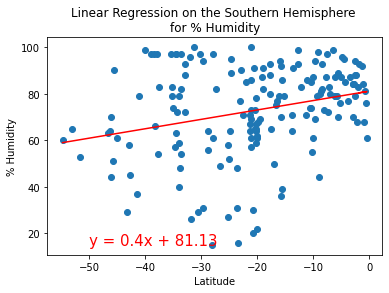

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

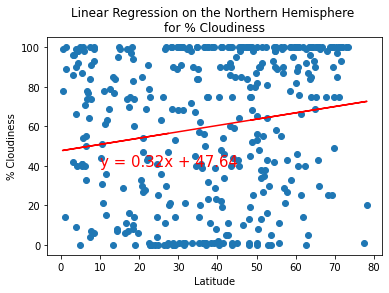

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

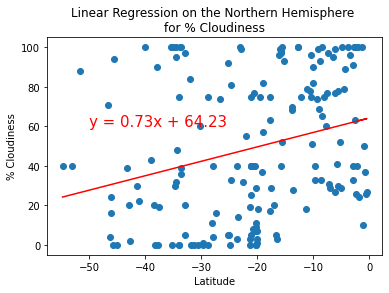

In [45]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

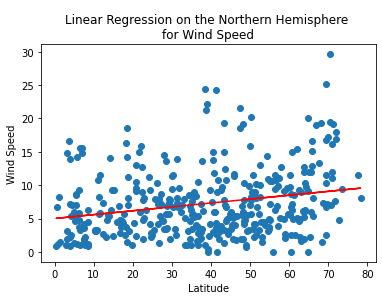

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

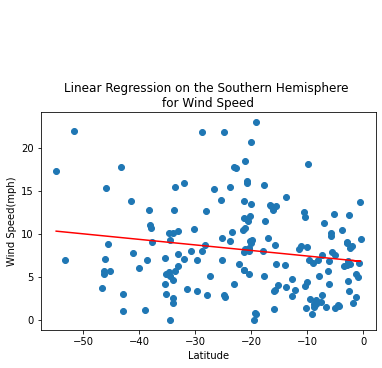

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [17]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda38

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_2 --> 4.10.3-py38haa244fe_3




conda-4.10.3         | 3.1 MB    |            |   0% 
conda-4.10.3         | 3.1 MB    |            |   1% 
conda-4.10.3         | 3.1 MB    | #8         |  19% 
conda-4.10.3         | 3.1 MB    | ###6       |  36% 
conda-4.10.3         | 3.1 MB    | #########8 |  98% 
conda-4.10.3         | 3.1 MB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying t

In [19]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
